<h1>Superhero Exploratory Analysis and Research Proposal</h1>
<p>The purpose of this projet is to explore and analyze superheros and their characteristics.</p>
<p>Data Source: https://www.kaggle.com/claudiodavi/superhero-set</p>
<p>There are two datasets: The first contains characteristics of each superhero and the second lists the superpowers that each hero has.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22})

sns.set_palette('bright')
sns.set_style('whitegrid')
sns.set_context('talk')

In [3]:
info_df = pd.read_csv('heroes_information.csv')
powers_df = pd.read_csv('super_hero_powers.csv')

In [4]:
info_df.columns

Index(['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color',
       'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [5]:
#drop unnamed column
info_df = info_df.drop(['Unnamed: 0'], axis=1)

In [6]:
#check for null values
info_df.isnull().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

In [7]:
#show rows where publisher is null
info_df[info_df.Publisher.isnull()]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


In [8]:
# get rid of NaN values for publisher
info_df.Publisher.fillna('Other', inplace=True)

In [9]:
# -99 is not a valid height or weight so set to NaN
info_df.replace(-99.0, np.nan, inplace=True)

In [10]:
#update genders if -
info_df.Gender.replace('-', 'Non-Binary', inplace=True)

In [11]:
#update alignment if -
info_df.Alignment.replace('-', 'None', inplace=True)

In [12]:
info_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,-,bad,NaN


Text(0,0.5,'Number of Superheros')

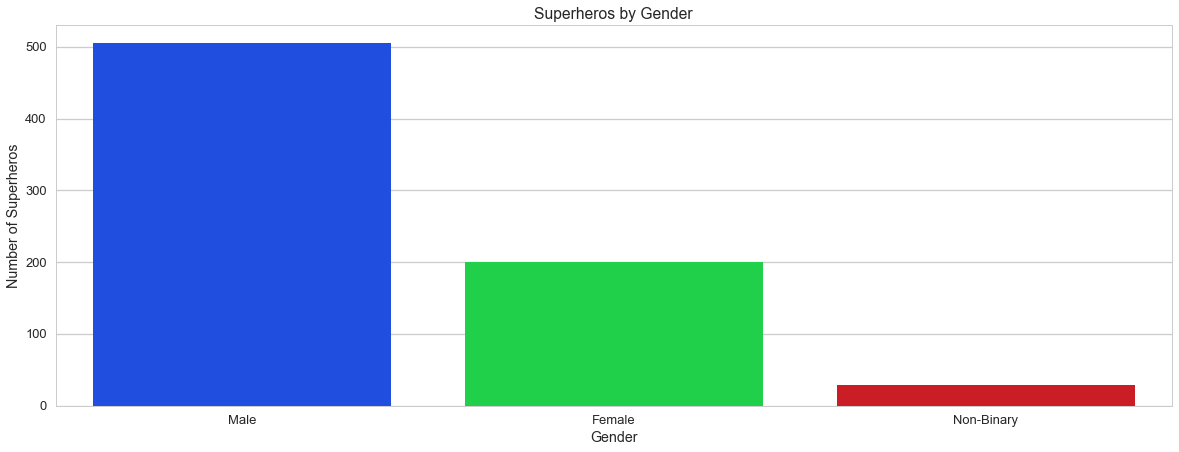

In [13]:
#plot number of superheros by gender
sns.countplot(x='Gender', data=info_df);

plt.title('Superheros by Gender')
plt.ylabel('Number of Superheros')

Notice there are many more males than females and many more females than non-binary.

In [14]:
#create new dataframe with only height and weight values that are not null
info_2 = info_df.dropna(subset=['Height', 'Weight'], how='any')
info_2.isnull().sum()

name          0
Gender        0
Eye color     0
Race          0
Hair color    0
Height        0
Publisher     0
Skin color    0
Alignment     0
Weight        0
dtype: int64

In [15]:
#keep only columns of interest for plotting
info_2 = info_2[['name', 'Gender', 'Height', 'Weight', 'Alignment']]

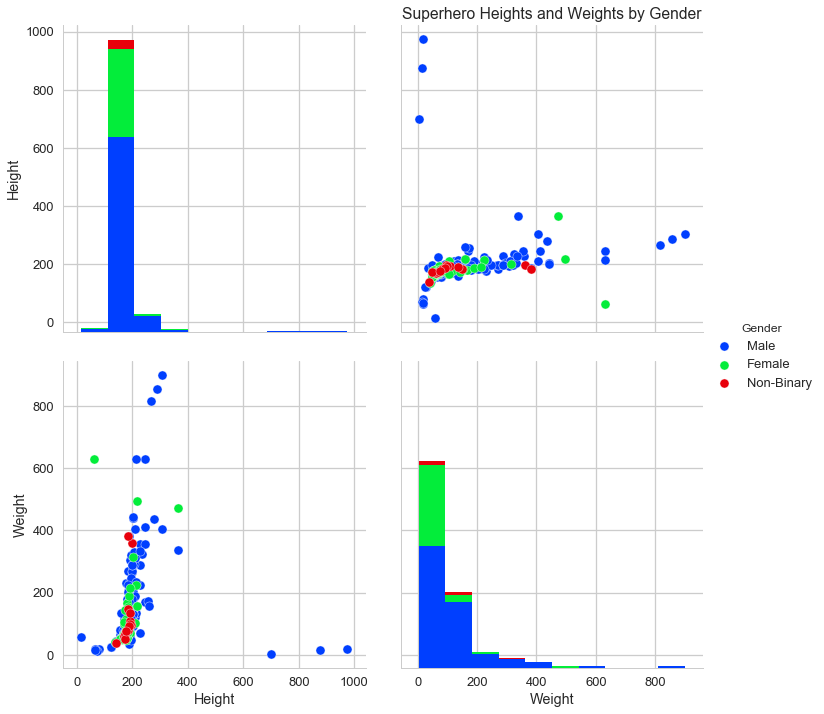

In [16]:
#plot height and weight by gender
sns.pairplot(data=info_2, hue='Gender', size=5)

plt.title('Superhero Heights and Weights by Gender')
plt.show();

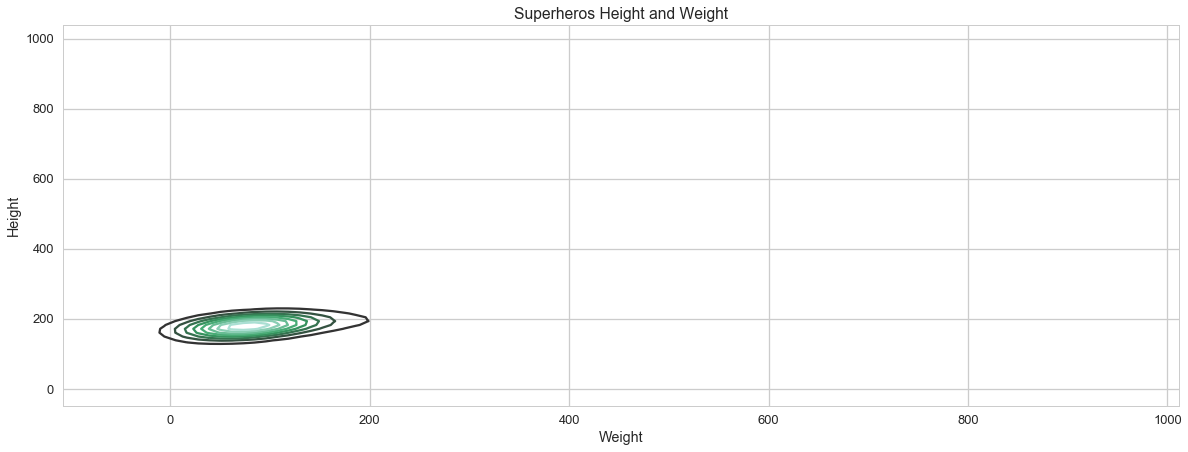

In [17]:
#another height and weight visualization
sns.kdeplot(info_2['Weight'], info_2['Height'])

plt.title('Superheros Height and Weight')
plt.show();

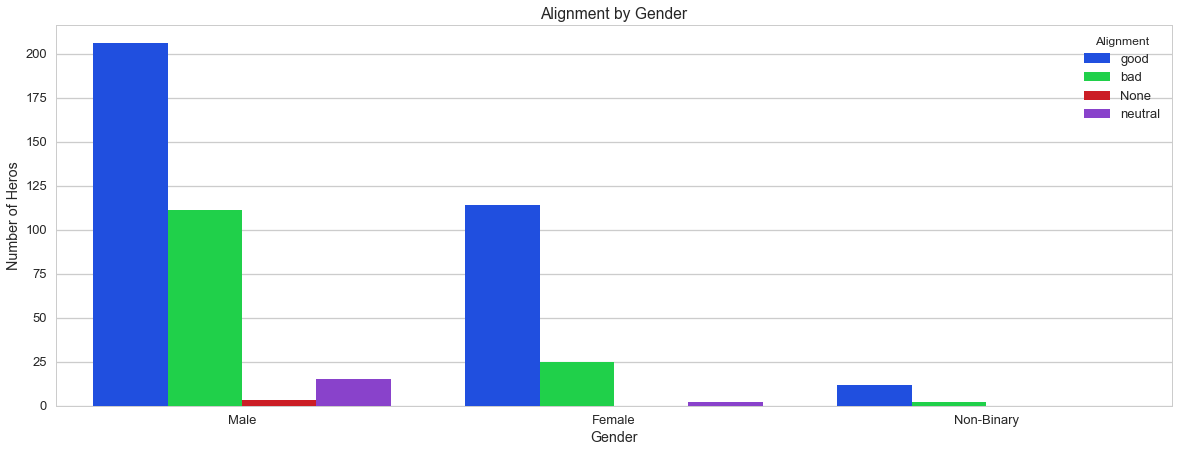

In [18]:
#plot alignment by gender
sns.countplot(info_2.Gender, hue=info_2.Alignment)

plt.title('Alignment by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Heros')
plt.show();

In [19]:
#neutral and none groups are both very small...combining into one group as neutral
info_2.Alignment.replace('None', 'neutral', inplace=True)
info_df.Alignment.replace('None', 'neutral', inplace=True)

In [20]:
info_2.Gender.value_counts()

Male          335
Female        141
Non-Binary     14
Name: Gender, dtype: int64

In [21]:
info_2.Alignment.value_counts()

good       332
bad        138
neutral     20
Name: Alignment, dtype: int64

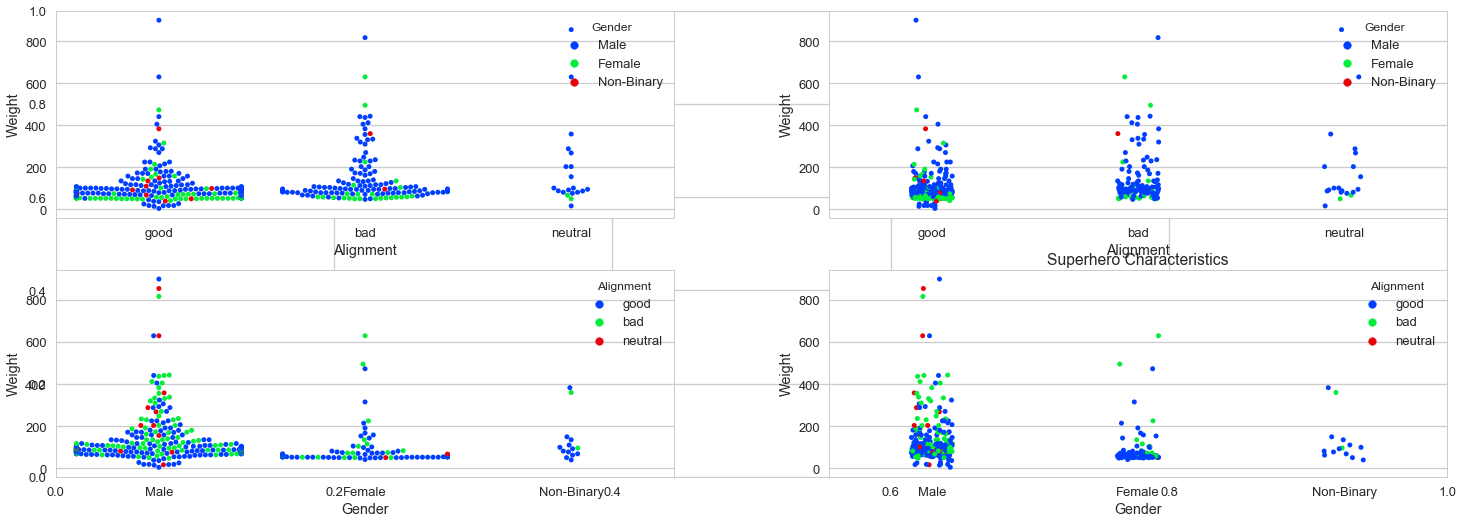

In [22]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.25, wspace=0.25)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

fig.add_subplot(221)
sns.swarmplot(x=info_2.Alignment, y=info_2.Weight, hue=info_2.Gender)

fig.add_subplot(222)
sns.stripplot(x=info_2.Alignment, y=info_2.Weight, hue=info_2.Gender, jitter=True)

fig.add_subplot(223)
sns.swarmplot(x=info_2.Gender, y=info_2.Weight, hue=info_2.Alignment)

fig.add_subplot(224)
sns.stripplot(x=info_2.Gender, y=info_2.Weight, hue=info_2.Alignment, jitter=True)

plt.title('Superhero Characteristics')
plt.show;

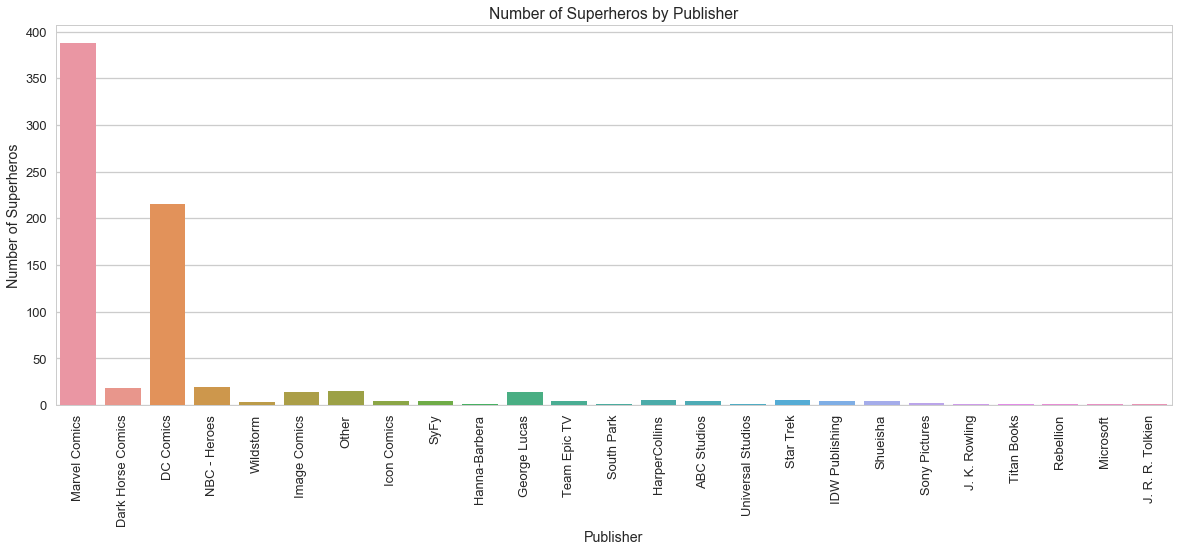

In [23]:
#plot number of superheros per publisher
sns.countplot(x="Publisher", data=info_df)

plt.title('Number of Superheros by Publisher')
plt.ylabel('Number of Superheros')
plt.xlabel('Publisher')
plt.xticks(rotation = 90)
plt.show();

In [24]:
#create new dataframe with only small publishers with < 200 superheros
counts = info_df.Publisher.value_counts()
small_publishers_df = info_df.loc[info_df['Publisher'].isin(counts[counts < 200].index), :]

small_publishers_count = small_publishers_df.Publisher.value_counts()

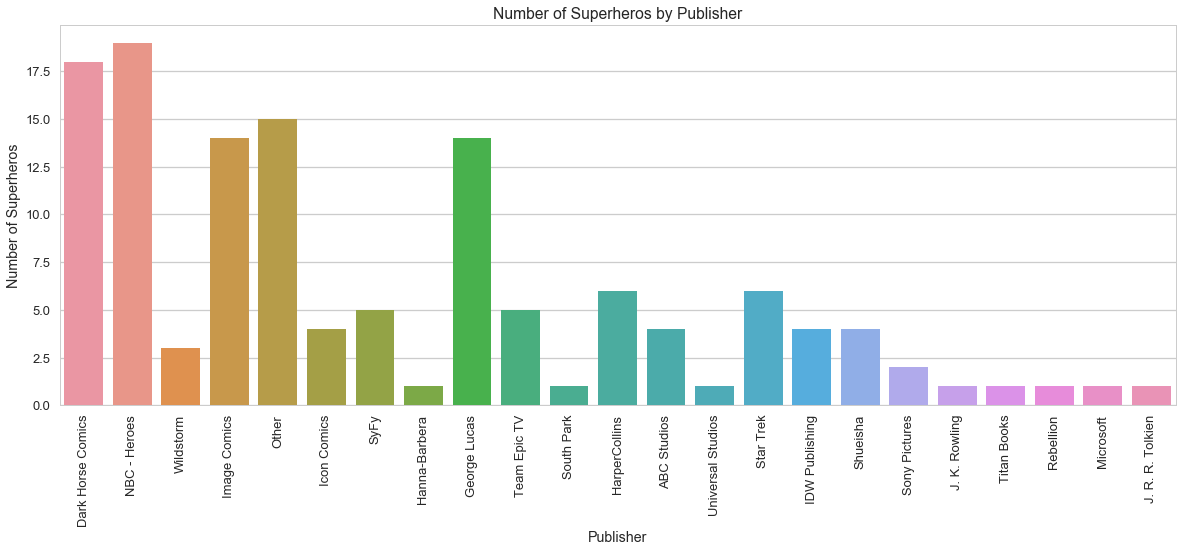

In [25]:
#plot only the small publishers
sns.countplot(x="Publisher", data=small_publishers_df)

plt.title('Number of Superheros by Publisher')
plt.ylabel('Number of Superheros')
plt.xlabel('Publisher')
plt.xticks(rotation = 90)
plt.show();

In [26]:
small_publishers_df.sort_values('Publisher')

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
363,Jim Powell,Male,-,-,-,NaN,ABC Studios,-,good,NaN
199,Daphne Powell,Female,-,-,-,NaN,ABC Studios,-,good,NaN
638,Stephanie Powell,Female,-,-,Blond,NaN,ABC Studios,-,good,NaN
364,JJ Powell,Male,-,-,-,NaN,ABC Studios,-,good,NaN
208,Dash,Male,blue,Human,Blond,122.0,Dark Horse Comics,-,good,27.0
235,Elastigirl,Female,brown,Human,Brown,168.0,Dark Horse Comics,-,good,56.0
321,Hellboy,Male,gold,Demon,Black,259.0,Dark Horse Comics,-,good,158.0
350,Jack-Jack,Male,blue,Human,Brown,71.0,Dark Horse Comics,-,good,14.0
698,Violet Parr,Female,violet,Human,Black,137.0,Dark Horse Comics,-,good,41.0
365,Johann Krauss,Male,-,-,-,NaN,Dark Horse Comics,-,good,NaN


In [27]:
powers_df.head(10)

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Abraxas,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,Absorbing Man,False,False,False,False,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
7,Adam Monroe,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,Adam Strange,False,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9,Agent Bob,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
# check if any NaN values
powers_df[powers_df.isnull().any(axis=1)]

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient


In [29]:
#create new column with sum of each superheros powers
powers_df['sum_powers'] = powers_df.iloc[2:].sum(axis=1)

In [30]:
#sort by most powers
most_powers = powers_df.sort_values('sum_powers', ascending=False)
most_powers.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,sum_powers
563,Spectre,True,True,False,True,False,False,True,True,True,...,True,False,False,False,False,False,False,False,False,49.0
18,Amazo,True,False,True,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,44.0
394,Martian Manhunter,True,False,False,False,False,True,True,False,True,...,False,False,False,False,False,False,False,False,False,35.0
370,Living Tribunal,True,True,False,True,False,False,True,True,True,...,True,False,False,False,False,False,False,False,False,35.0
388,Man of Miracles,False,True,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,True,34.0


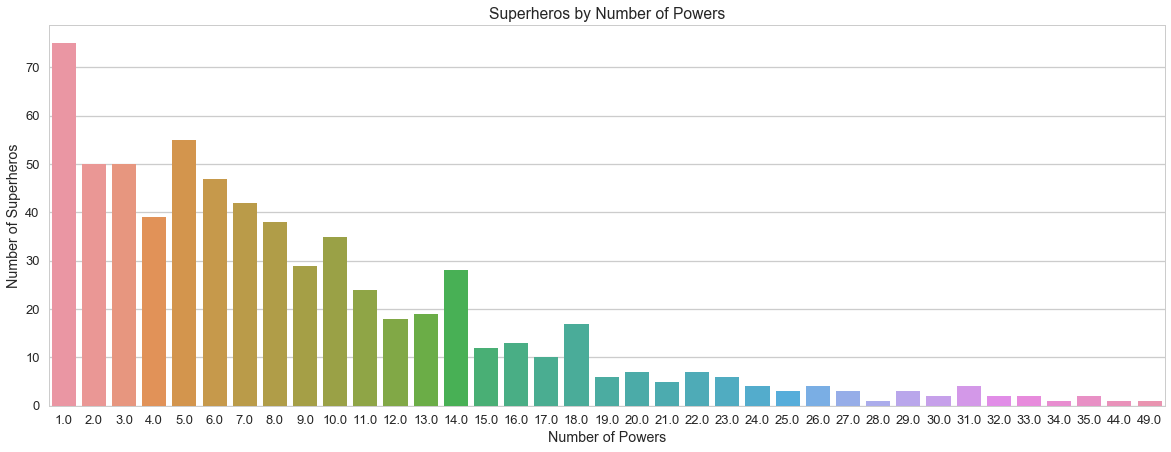

In [31]:
#plot superheros by number of powers
sns.countplot(x='sum_powers', data=powers_df)

plt.xlabel('Number of Powers')
plt.ylabel('Number of Superheros')
plt.title('Superheros by Number of Powers')
plt.show();

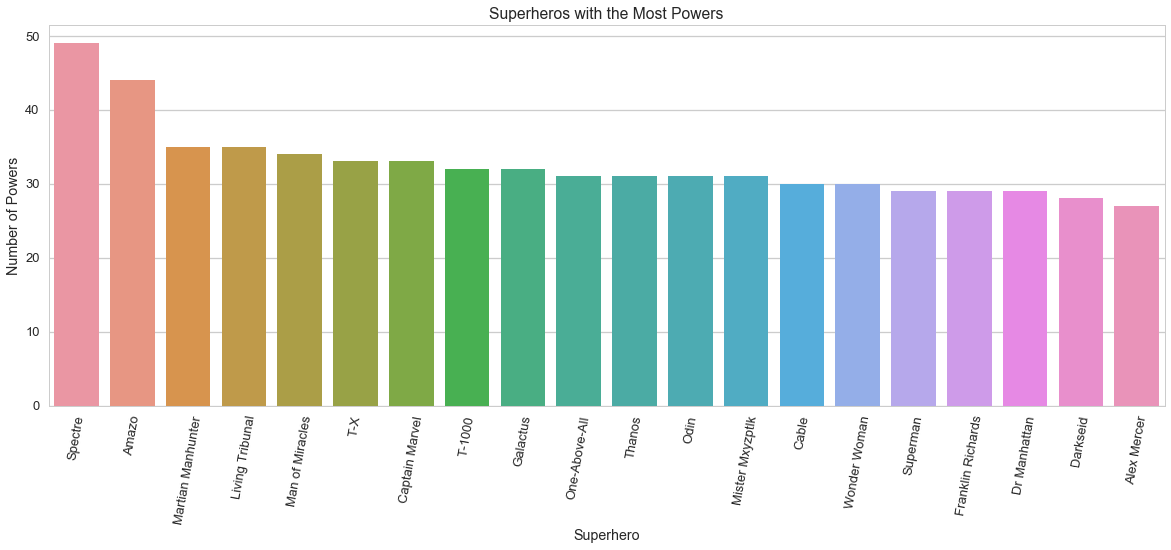

In [32]:
#plot superheros with the most powers
most_powers = powers_df[['hero_names', 'sum_powers']].sort_values('sum_powers', ascending=False)

sns.barplot(x=most_powers['hero_names'].head(20),
            y='sum_powers', 
            data=most_powers)

plt.xticks(rotation=80)
plt.title('Superheros with the Most Powers')
plt.xlabel('Superhero')
plt.ylabel('Number of Powers')
plt.show();

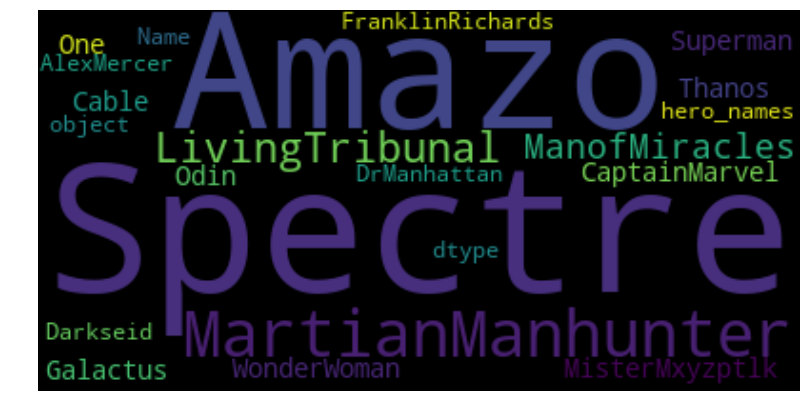

In [33]:
#create a word cloud of superheros with the most powers
from wordcloud import WordCloud

#remove spaces in between name parts - wordcloud splits on whitespace
heronames = most_powers['hero_names'].str.replace(' ', '')

wordcloud = WordCloud().generate(str(heronames.head(20)))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
#create new df with number of superheros with each power
sum_row = {col: powers_df[col].sum() for col in powers_df}

sum_df = pd.DataFrame(sum_row, index=["Total"])

sum_df = sum_df.drop('hero_names', axis=1)
sum_df = sum_df.drop('sum_powers', axis=1)


sum_df.tail()

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
Total,242,178,11,25,47,257,126,77,212,30,...,14,16,2,9,1,1,1,2,2,2


In [35]:
#transform df
sum_df = sum_df.T
sum_df.head()

,Total
Agility,242
Accelerated Healing,178
Lantern Power Ring,11
Dimensional Awareness,25
Cold Resistance,47


In [36]:
sum_df = sum_df.reset_index()
sum_df.rename(columns = {'index':'Powers'}, inplace=True)

In [37]:
sum_df.columns

Index(['Powers', 'Total'], dtype='object')

In [38]:
#sort powers by most common
sum_df = sum_df.sort_values('Total', ascending=False)
sum_df.head()

,Powers,Total
17,Super Strength,360
25,Stamina,289
5,Durability,257
30,Super Speed,249
0,Agility,242


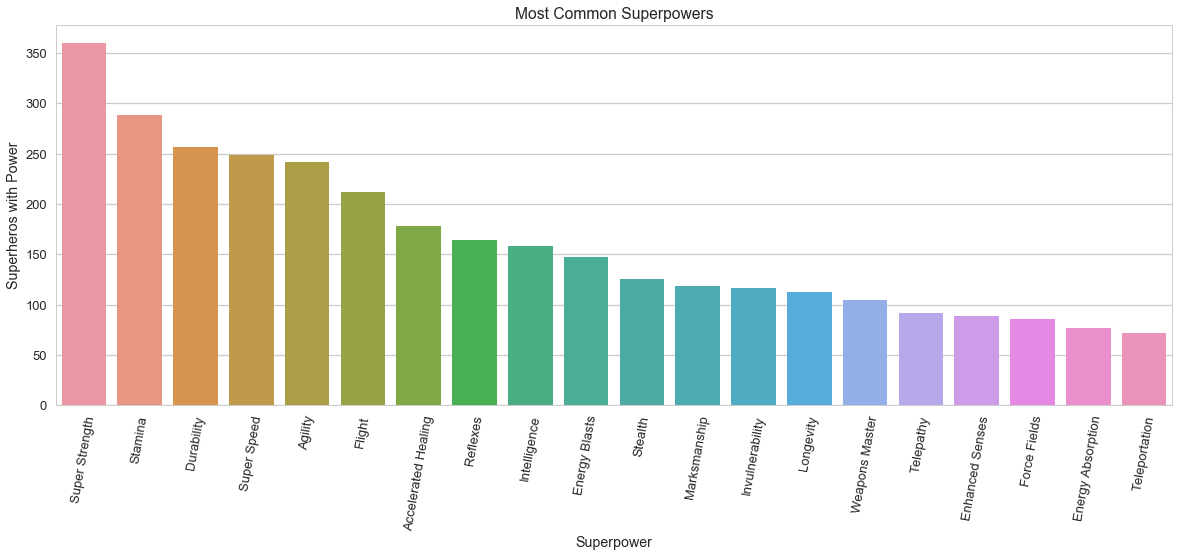

In [39]:
#plot most common superpowers
sns.barplot(x=sum_df['Powers'].head(20),
            y='Total', 
            data=sum_df)

plt.xticks(rotation=80)
plt.title('Most Common Superpowers')
plt.xlabel('Superpower')
plt.ylabel('Superheros with Power')
plt.show();

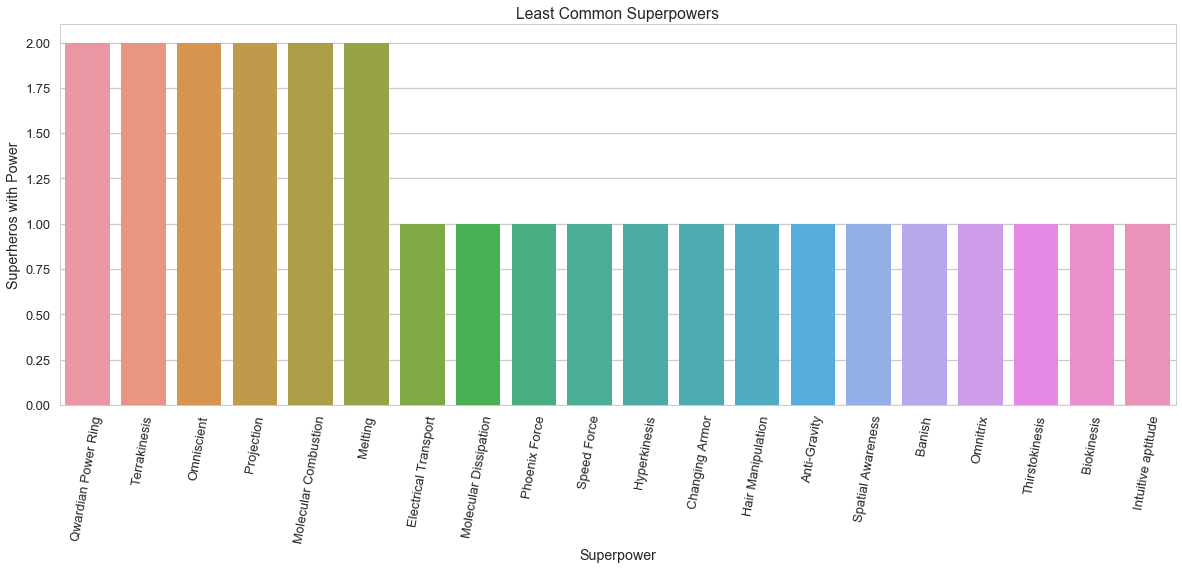

In [40]:
#plot least common superpowers
sns.barplot(x=sum_df['Powers'].tail(20),
            y='Total', 
            data=sum_df)

plt.xticks(rotation=80)
plt.title('Least Common Superpowers')
plt.xlabel('Superpower')
plt.ylabel('Superheros with Power')
plt.show();

In [41]:
#merge original dataframes together
merged_df = pd.merge(info_df, powers_df, left_on='name', right_on='hero_names', how='inner')

In [42]:
#view new df head
merged_df.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,sum_powers
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0,...,False,False,False,False,False,False,False,False,False,NaN
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,16.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,1.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0,...,False,False,False,False,False,False,False,False,False,8.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,-,bad,NaN,...,False,False,False,False,False,False,False,False,False,14.0


In [43]:
merged_df.shape

(660, 179)

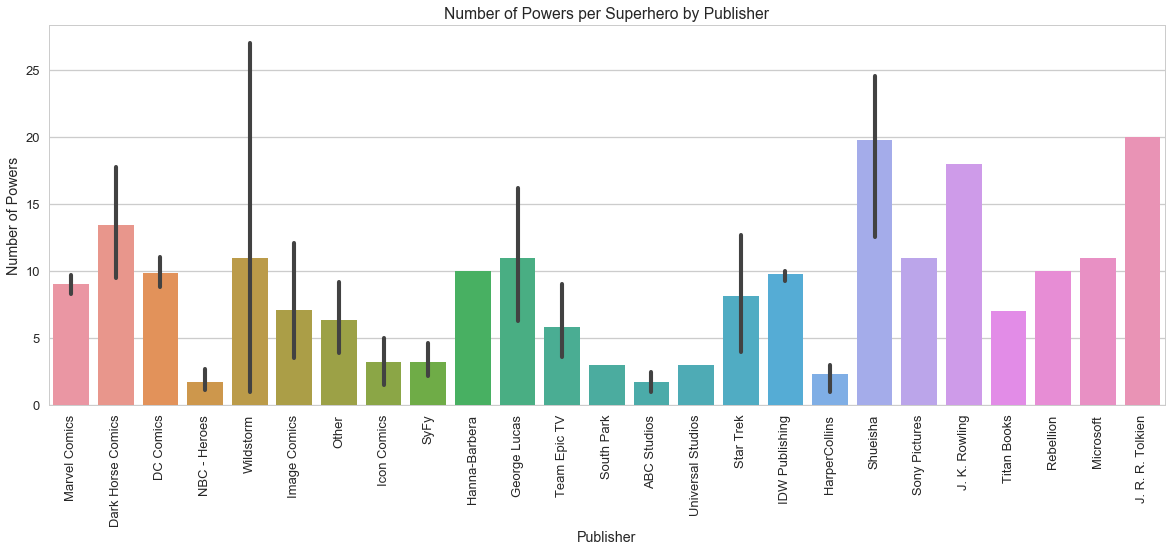

In [44]:
#plot number of superpowers by publisher
sns.barplot(x='Publisher', y='sum_powers', data=merged_df)
plt.xticks(rotation = 90);

plt.title('Number of Powers per Superhero by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Powers')
plt.show();

<p>There seems to be a very large variation in superheros.  This leads to the question what exactly is a superhero?</p>

<p>According to <a href='https://www.merriam-webster.com/dictionary/superheroSuperhero' target='blank'>Merriam Webster</a> a superhero is fictional hero having extraordinary or superhuman powers or also an exceptionally skillful or successful person.</p>



In [45]:
#What superhero is from South Park?
merged_df.loc[merged_df['Publisher'] == 'South Park']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,sum_powers
140,Captain Hindsight,Male,-,Human,Black,NaN,South Park,-,good,NaN,...,False,False,False,False,False,False,False,False,False,3.0


In [46]:
#Is he really a superhero?? where is Mario then!?
merged_df.loc[merged_df['Publisher'] == 'Microsoft']

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient,sum_powers
391,Master Chief,Male,brown,Human / Altered,Brown,213.0,Microsoft,-,good,NaN,...,False,False,False,False,False,False,False,False,False,11.0


In [47]:
merged_df.Publisher.value_counts()

Marvel Comics        341
DC Comics            196
NBC - Heroes          18
Dark Horse Comics     18
Image Comics          14
George Lucas          13
Other                 13
Star Trek              6
SyFy                   5
Team Epic TV           5
IDW Publishing         4
Shueisha               4
Icon Comics            4
ABC Studios            4
Wildstorm              3
HarperCollins          3
Hanna-Barbera          1
J. R. R. Tolkien       1
Microsoft              1
J. K. Rowling          1
Universal Studios      1
South Park             1
Sony Pictures          1
Rebellion              1
Titan Books            1
Name: Publisher, dtype: int64

In [48]:
#the small publishers have significantly less superheros so keeping only the superheros from Marvel and DC
merged_df = merged_df[(merged_df['Publisher'] == 'Marvel Comics') | (merged_df['Publisher'] == 'DC Comics')]

In [49]:
merged_df.Publisher.value_counts()

Marvel Comics    341
DC Comics        196
Name: Publisher, dtype: int64

In [50]:
#t-test comparing number of male heroes to female
print(ttest_ind(merged_df['Gender'] == 'Male', merged_df['Gender'] == 'Female'))

Ttest_indResult(statistic=14.312934728503441, pvalue=1.1846249701575124e-42)


In [51]:
#t-test comparing number of powers for males and females
ttest_ind(merged_df.dropna()['sum_powers'][merged_df['Gender'] == 'Male'],
          merged_df.dropna()['sum_powers'][merged_df['Gender'] =='Female'])

Ttest_indResult(statistic=2.1723367644180773, pvalue=0.030383646601968094)

In [52]:
#find mean number of powers by gender
merged_df.groupby('Gender')['sum_powers'].mean()

Gender
Female        7.934641
Male          9.904632
Non-Binary    9.250000
Name: sum_powers, dtype: float64

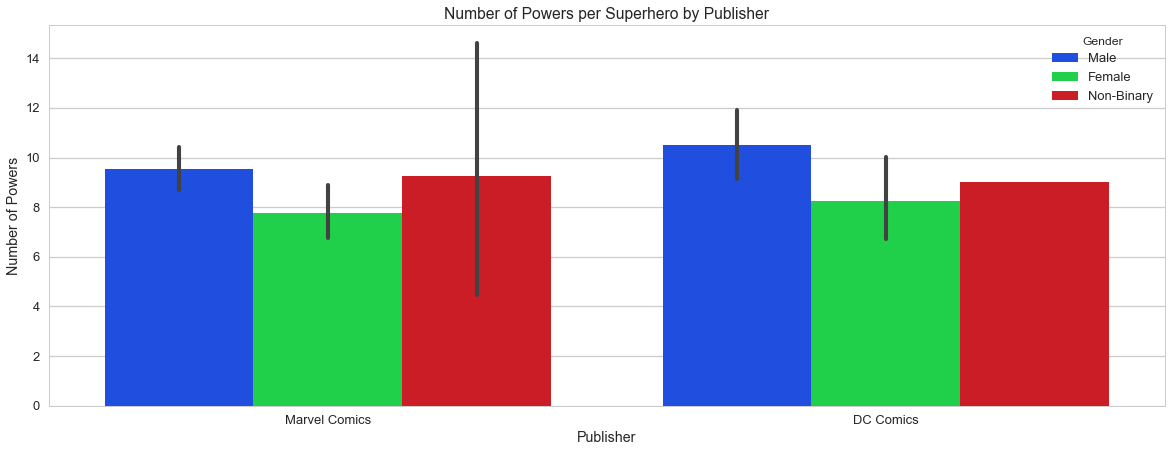

In [53]:
#plot number of superpowers by publisher
sns.barplot(x='Publisher', y='sum_powers', hue='Gender', data=merged_df)

plt.title('Number of Powers per Superhero by Publisher')
plt.xlabel('Publisher')
plt.ylabel('Number of Powers')
plt.show();

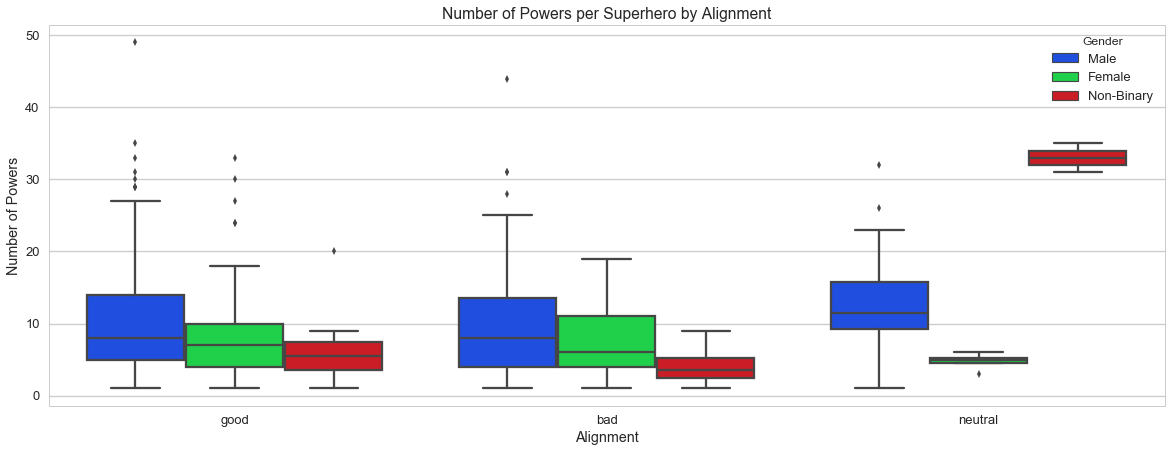

In [54]:
#plot number of powers by Alignment
sns.boxplot(x=merged_df.Alignment, y=merged_df.sum_powers, hue=merged_df.Gender)

plt.title('Number of Powers per Superhero by Alignment')
plt.xlabel('Alignment')
plt.ylabel('Number of Powers')
plt.show();

<h2>Data Experiment Proposal</h2>

<p>Simply adding up the number of powers is not enough to determine the most powerful superhero.  We also need to take into account the value of each power.  The website, superherodb.com that this dataset was scraped from also has a power bonus for each available power.  Some powers are obviously more valueable than others and should be weighted more heavily.  Also, some heroes have weaknesses that should also be accounted for to find a true ranking of most powerful superhero.</p>

<p>My hypothesis is that once the relative power levels and weaknesses are accounted for, female superheroes are stronger than male superheroes eventhough they are generally given a lower number of powers than male superheroes.</p>
    

<h4>Rollout Plan</h4>

<p>
Write a scraper to collect more data from superherodb.com, making sure to include the power bonus values for each power and any weaknesses each superhero may have.  After collecting the additional information, explore the data and calculate statistics.
</p>

<h4>Evaluation Plan</h4>

<p>
Rank the superheroes by the relative power levels, and not just by the total number of powers.  Find the mean power level and standard deviation for each group of heroes, male and female, and compare the two groups.  And finally compare the males to females to determine the most powerful gender.
</p>